# DataSet Creation

In [1]:
#Bu kod bloku veri kümesini oluşturmak için kurulmuşdur. self.url ve self.url2 den alınan infolarla veri kümesi oluşturuyorum.
#Bu blok kodu işlekdir fakat run edilmesi tavsiye olunmuyor. İMDB veb sitesi farklı üklerede farklı dilde olduğundan
# dolayı veri kümesi ben oluşturduğum veri kümesinden farkli ola bilir

# Starting Point blokundan run edilmesi tavsiye olunur
import requests
from bs4 import BeautifulSoup
import csv
import re

class Scraper():    
    
    def __init__(self):
        self.titles_data = [] 
        self.ratings_data = []
        self.years_data = []
        self.categories_data = []
        self.durations_data = []
        self.scores_data = []
        self.oscars_data = []
        self.metascores_data = []
        self.votes_data = []
        self.gross_data = []
        self.directors_data = []
        self.oscars_data = ['1','1','1','0','1','1','1','0','0','1','1','0','0','1','0','1','1','0','1','1','1','1','0','0','0','1','0','0','1','0','0','0','0','0','0','1','0','0','0','0','0','0','1','0','0','1','0','0','0','0','1','0','0','1','0','0','1','1','0','0','0','0','0','1','1','1','0','0','1','0','0','0','0','1','0','1','0','0','0','1','0','1','0','1','0','0','0','0','1','0','1','0','0','1','0','0','1','0','0','0','0','0','0','0','0','0','0','0','0','1','1','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','1','0','0','1','0','1','0','0','1','0','0','0','0','0','0','1','1','0','0','0','0','1','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','0','0','0','0','0','1','1','0','0','0','0','0','1','0','0']
        self.url = "https://www.imdb.com/list/ls051781075/"
        self.url2 = "https://www.imdb.com/list/ls051781075/?page=2"
        
    def scrapData(self):
        title_class = ".lister-item-header"
        rating_class = ".lister-item-index.unbold.text-primary"
        year_class = ".lister-item-year.text-muted.unbold"
        category_class = ".genre"
        duration_class = ".runtime"
        score_class = ".ipl-rating-star.small"
        vote_class = ".lister-item-content"
        metascore_class = ".inline-block.ratings-metascore"
        gross_class = ".lister-item-content"
        director_class = ".lister-item-content"
        
        print("fetching...")
        
        r = requests.get(self.url)
        rsoup = BeautifulSoup(r.text,'lxml')
        titles = rsoup.select(title_class)
        ratings = rsoup.select(rating_class)
        years = rsoup.select(year_class)
        categories = rsoup.select(category_class)
        durations = rsoup.select(duration_class)
        scores = rsoup.select(score_class)
        votes = rsoup.select(vote_class)
        metascores = rsoup.select(metascore_class)
        gross = rsoup.select(gross_class)
        directors = rsoup.select(director_class)
        
        r2 = requests.get(self.url)
        rsoup2 = BeautifulSoup(r2.text,'lxml')
        titles2 = rsoup2.select(title_class)
        ratings2 = rsoup2.select(rating_class)
        years2 = rsoup2.select(year_class)
        categories2 = rsoup2.select(category_class)
        durations2 = rsoup2.select(duration_class)
        scores2 = rsoup2.select(score_class)
        votes2 = rsoup2.select(vote_class)
        metascores2 = rsoup2.select(metascore_class)
        gross2 = rsoup2.select(gross_class)
        directors2 = rsoup2.select(director_class)
        
        
        [self.titles_data.append(titles[i].find('a').getText()) for i in range(len(titles))]
        [self.years_data.append(years[i].getText()[years[i].getText().find('(')+1:years[i].getText().find(')')].translate( { ord(","): None } )) for i in range(len(years))]
        [self.ratings_data.append(ratings[i].getText()) for i in range(len(ratings))]
        [self.categories_data.append(categories[i].getText().strip()) for i in range(len(categories))]
        [self.durations_data.append(durations[i].getText()) for i in range(len(durations))]
        [self.scores_data.append(scores[i].getText().strip()) for i in range(len(scores))]
        [self.metascores_data.append(metascores[i].find('span').getText()) for i in range(len(metascores))]
        [self.votes_data.append(votes[i].find_next('p').find_next('p').find_next('p').find_next('p').find_next('span').find_next('span').getText()) for i in range(len(votes))]
        [self.gross_data.append(gross[i].find_next('p').find_next('p').find_next('p').find_next('p').find_next('span').find_next('span').find_next('span').find_next('span').find_next('span').getText()) for i in range(len(gross))]
        [self.directors_data.append(directors[i].find_next('p').find_next('p').find_next('p').find_next('a').getText()) for i in range(len(directors))]

        
        [self.titles_data.append(titles2[i].find('a').getText()) for i in range(len(titles2))]
        [self.years_data.append(years2[i].getText()[years2[i].getText().find('(')+1:years2[i].getText().find(')')].translate( { ord(","): None } )) for i in range(len(years2))]
        [self.ratings_data.append(ratings2[i].getText()) for i in range(len(ratings2))]
        [self.categories_data.append(categories2[i].getText().strip()) for i in range(len(categories2))]
        [self.durations_data.append(durations2[i].getText()) for i in range(len(durations2))]
        [self.scores_data.append(scores2[i].getText().strip()) for i in range(len(scores2))]
        [self.metascores_data.append(metascores2[i].find('span').getText()) for i in range(len(metascores2))]
        [self.votes_data.append(votes2[i].find_next('p').find_next('p').find_next('p').find_next('p').find_next('span').find_next('span').getText()) for i in range(len(votes2))]
        [self.gross_data.append(gross2[i].find_next('p').find_next('p').find_next('p').find_next('p').find_next('span').find_next('span').find_next('span').find_next('span').find_next('span').getText()) for i in range(len(gross2))]
        [self.directors_data.append(directors2[i].find_next('p').find_next('p').find_next('p').find_next('a').getText()) for i in range(len(directors2))]
        
        print('Title','Rating',len(self.titles_data))
        print(len(self.ratings_data))
        print(len(self.years_data))
        print(len(self.categories_data))
        print(len(self.durations_data))
        print(len(self.scores_data))
        print(len(self.metascores_data))
        print(len(self.votes_data))
        print(len(self.gross_data))
        print(len(self.oscars_data))
        
        for i in range(len(self.ratings_data)):
            print(self.titles_data[i],self.ratings_data[i],self.years_data[i],self.scores_data[i],self.metascores_data[i],self.categories_data[i],self.votes_data[i],self.gross_data[i],self.directors_data[i],self.oscars_data[i])
        
if __name__=='__main__':
    scraper = Scraper()
    scraper.scrapData()



fetching...
Title Rating 200
200
200
200
200
200
200
200
200
200
Kriminal Qirayet 1. 1994 8.9 95         Crime, Drama 2,106,562 $107.93M Quentin Tarantino 1
Saving Private Ryan 2. 1998 8.6 91         Drama, War 1,421,554 $216.54M Steven Spielberg 1
The Departed 3. 2006 8.5 85         Crime, Drama, Thriller 1,354,355 $132.38M Martin Scorsese 1
Heat 4. 1995 8.3 76         Action, Crime, Drama 674,095 $67.44M Michael Mann 0
The Silence of the Lambs 5. 1991 8.6 86         Crime, Drama, Thriller 1,465,579 $130.74M Jonathan Demme 1
No Country for Old Men 6. 2007 8.2 92         Crime, Drama, Thriller 1,000,119 $74.28M Ethan Coen 1
Toy Story 7. 1995 8.3 96         Animation, Adventure, Comedy 1,016,544 $191.80M John Lasseter 1
Shoushenkden Qacish 8. 1994 9.3 82         Drama 2,741,409 $28.34M Frank Darabont 0
Gangs of New York 9. 2002 7.5 72         Crime, Drama 453,665 $77.81M Martin Scorsese 0
The Lord of the Rings: The Two Towers 10. 2002 8.8 87         Action, Adventure, Drama 1,701,266 $3

In [2]:
# Starting Point blokundan run edilmesi tavsiye olunur
csv_file = 'C:/Users/ferid/Desktop/za.csv'


data = list(zip(scraper.ratings_data,scraper.titles_data,scraper.years_data,scraper.directors_data,scraper.categories_data,scraper.scores_data,scraper.metascores_data,scraper.votes_data,scraper.gross_data,scraper.oscars_data))


with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Rating","Title","Release Year","Director","Genres","Score","Meta Score","Votes N","Gross","Oscar"])
        writer.writerows(data)  # Write data rows

with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
        	print(row)

['Rating', 'Title', 'Release Year', 'Director', 'Genres', 'Score', 'Meta Score', 'Votes N', 'Gross', 'Oscar']
['1.', 'Kriminal Qirayet', '1994', 'Quentin Tarantino', 'Crime, Drama', '8.9', '95        ', '2,106,562', '$107.93M', '1']
['2.', 'Saving Private Ryan', '1998', 'Steven Spielberg', 'Drama, War', '8.6', '91        ', '1,421,554', '$216.54M', '1']
['3.', 'The Departed', '2006', 'Martin Scorsese', 'Crime, Drama, Thriller', '8.5', '85        ', '1,354,355', '$132.38M', '1']
['4.', 'Heat', '1995', 'Michael Mann', 'Action, Crime, Drama', '8.3', '76        ', '674,095', '$67.44M', '0']
['5.', 'The Silence of the Lambs', '1991', 'Jonathan Demme', 'Crime, Drama, Thriller', '8.6', '86        ', '1,465,579', '$130.74M', '1']
['6.', 'No Country for Old Men', '2007', 'Ethan Coen', 'Crime, Drama, Thriller', '8.2', '92        ', '1,000,119', '$74.28M', '1']
['7.', 'Toy Story', '1995', 'John Lasseter', 'Animation, Adventure, Comedy', '8.3', '96        ', '1,016,544', '$191.80M', '1']
['8.', 'S

# Starting Point

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import re

# başka bir yerde run olunursa path değişmelidir
film_df = pd.read_csv('C:/Users/ferid/Desktop/za.csv')

film_df.shape



(200, 10)

In [2]:
film_df.head()

,Rating,Title,Release Year,Director,Genres,Score,Meta Score,Votes N,Gross,Oscar
0,1.0,Kriminal Qirayet,1994,Quentin Tarantino,"Crime, Drama",8.9,95,"2,106,562",$107.93M,1
1,2.0,Saving Private Ryan,1998,Steven Spielberg,"Drama, War",8.6,91,"1,421,554",$216.54M,1
2,3.0,The Departed,2006,Martin Scorsese,"Crime, Drama, Thriller",8.5,85,"1,354,355",$132.38M,1
3,4.0,Heat,1995,Michael Mann,"Action, Crime, Drama",8.3,76,"674,095",$67.44M,0
4,5.0,The Silence of the Lambs,1991,Jonathan Demme,"Crime, Drama, Thriller",8.6,86,"1,465,579",$130.74M,1


In [3]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        200 non-null    float64
 1   Title         200 non-null    object 
 2   Release Year  200 non-null    int64  
 3   Director      200 non-null    object 
 4   Genres        200 non-null    object 
 5   Score         200 non-null    float64
 6   Meta Score    200 non-null    int64  
 7   Votes N       200 non-null    object 
 8   Gross         200 non-null    object 
 9   Oscar         200 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 15.8+ KB


In [4]:
#Benim IMDB sayfamda bazı film isimleri azerbaycanca olduğundan dolayı onları ingilisce yaptım
#Run verirken kırmızı output görmeniz normal

film_df['Title'][0] = 'Pulp Fiction'
film_df['Title'][7] = 'Shawshank Redemption'
film_df['Title'][11] = 'Seven'
film_df['Title'][23] = 'Reservoir Dogs'
film_df['Title'][27] = 'Jackie Brown'
film_df['Title'][31] = 'Fight Club'
film_df['Title'][41] = 'Toy Story 2'
film_df['Title'][96] = 'The Usual Suspects'
film_df['Title'][103] = 'Despicable Me'
film_df['Title'][105] = 'The Life of David Gale'
film_df['Title'][136] = 'Mrs Doubfire'
film_df['Title'][141] = 'Inglourious Basterds'
film_df['Title'][170] = 'V For Vendetta'
film_df['Title'][190] = 'Training Day'

# 100 cü filmden sonrakı filmlerin reytinqi 1 den başladığı için onların üzerine 100 ekledim
for x in range(101,200):
    film_df['Rating'][x] = str(int(film_df['Rating'][x])+100)

#Votes kısmındakı rakamları 2,124 yerine 2124 yapıyorum
for x in range(200):
    if len(film_df['Votes N'][x])>7 :
        film_df['Votes N'][x] = film_df['Votes N'][x].split(',')[0]+film_df['Votes N'][x].split(',')[1]+film_df['Votes N'][x].split(',')[2]
    else:
        film_df['Votes N'][x] = film_df['Votes N'][x].split(',')[0]+film_df['Votes N'][x].split(',')[1]

#Gross column-dakı rakamları $123M yerine 123 yapıyorum        
for x in range(200):
    film_df['Gross'][x] = film_df['Gross'][x].replace('$','').split('M')[0]

C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\3607768841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_df['Title'][0] = 'Pulp Fiction'
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\3607768841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_df['Title'][7] = 'Shawshank Redemption'
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\3607768841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_df['Title'][11] 

In [5]:
film_df.head()

,Rating,Title,Release Year,Director,Genres,Score,Meta Score,Votes N,Gross,Oscar
0,1.0,Pulp Fiction,1994,Quentin Tarantino,"Crime, Drama",8.9,95,2106562,107.93,1
1,2.0,Saving Private Ryan,1998,Steven Spielberg,"Drama, War",8.6,91,1421554,216.54,1
2,3.0,The Departed,2006,Martin Scorsese,"Crime, Drama, Thriller",8.5,85,1354355,132.38,1
3,4.0,Heat,1995,Michael Mann,"Action, Crime, Drama",8.3,76,674095,67.44,0
4,5.0,The Silence of the Lambs,1991,Jonathan Demme,"Crime, Drama, Thriller",8.6,86,1465579,130.74,1


In [6]:
film_df.describe()

,Release Year,Score,Meta Score,Oscar
count,200.000000,200.000000,200.000000,200.000000
mean,1999.410000,7.829000,69.050000,0.265000
std,7.313641,0.765368,18.733988,0.442441
min,1972.000000,5.300000,16.000000,0.000000
25%,1995.750000,7.300000,59.750000,0.000000
50%,2000.000000,7.900000,72.500000,0.000000
75%,2004.250000,8.400000,83.250000,1.000000
max,2010.000000,9.300000,100.000000,1.000000


In [7]:
film_df = pd.get_dummies(film_df,columns = ['Director'])

In [8]:
#Title ve Genres columlarını drop yapıyorum. Kategorik olmadıkları için
#Burada director isimlerinide drop yapmak olurdu
film_df = film_df.drop(['Title','Genres'],axis=1)
labels_dist = film_df['Oscar'].value_counts()
labels_dist = pd.DataFrame(labels_dist)
#Oscar kazanan ve kazanmayan filmlerin faiz oranını print ediyorum
labels_dist["in_percentage" ]= round((labels_dist.Oscar/sum(labels_dist.Oscar))*100,2)
labels_dist

,Oscar,in_percentage
0,147,73.5
1,53,26.5


In [9]:
y = film_df['Oscar']
X = film_df.drop('Oscar', axis=1)

# Datamdakı imbalansı aradan kaldıriyorum
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

In [10]:
labels_dist = y.value_counts()
labels_dist = pd.DataFrame(labels_dist)
labels_dist["in_percentage" ]= round((labels_dist.Oscar/sum(labels_dist.Oscar))*100,2)
labels_dist

,Oscar,in_percentage
1,147,50.0
0,147,50.0


In [11]:
from sklearn.model_selection import train_test_split
# Training ve testing datasetlerimi oluşturuyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
# Bizden 10 katlı çapraz geçerleme istenildiği için 10 tane testing ve training dataset kuruyorum
# Her bir testing dataframe farklı bir alanı içerer
#Run verirken kırmızı output görmeniz normal
x2 = X[:20]
x2_2 = X[40:200]
X_train2 = x2.append(x2_2, ignore_index=True)
X_test2 = X[20:40]
y2 = y[:20]
y2_2 = y[40:200]
y_train2 = y2.append(y2_2, ignore_index=True)
y_test2 = y[20:40]


x3 = X[:40]
x3_2 = X[60:200]
X_train3 = x3.append(x3_2, ignore_index=True)
X_test3 = X[40:60]
y3 = y[:40]
y3_2 = y[60:200]
y_train3 = y3.append(y3_2, ignore_index=True)
y_test3 = y[40:60]


x4 = X[:60]
x4_2 = X[80:200]
X_train4 = x4.append(x4_2, ignore_index=True)
X_test4 = X[60:80]
y4 = y[:60]
y4_2 = y[80:200]
y_train4 = y4.append(y4_2, ignore_index=True)
y_test4 = y[60:80]


x5 = X[:80]
x5_2 = X[100:200]
X_train5 = x5.append(x5_2, ignore_index=True)
X_test5 = X[80:100]
y5 = y[:80]
y5_2 = y[100:200]
y_train5 = y5.append(y5_2, ignore_index=True)
y_test5 = y[80:100]


x6 = X[:100]
x6_2 = X[120:200]
X_train6 = x6.append(x6_2, ignore_index=True)
X_test6 = X[100:120]
y6 = y[:100]
y6_2 = y[120:200]
y_train6 = y6.append(y6_2, ignore_index=True)
y_test6 = y[100:120]


x7 = X[:120]
x7_2 = X[140:200]
X_train7 = x7.append(x7_2, ignore_index=True)
X_test7 = X[120:140]
y7 = y[:120]
y7_2 = y[140:200]
y_train7 = y7.append(y7_2, ignore_index=True)
y_test7 = y[120:140]


x8 = X[:140]
x8_2 = X[160:200]
X_train8 = x8.append(x8_2, ignore_index=True)
X_test8 = X[140:160]
y8 = y[:140]
y8_2 = y[160:200]
y_train8 = y8.append(y8_2, ignore_index=True)
y_test8 = y[140:160]


x9 = X[:160]
x9_2 = X[180:200]
X_train9 = x9.append(x9_2, ignore_index=True)
X_test9 = X[160:180]
y9 = y[:160]
y9_2 = y[180:200]
y_train9 = y9.append(y9_2, ignore_index=True)
y_test9 = y[160:180]



X_train10 = X[0:180]
X_test10 = X[180:200]
y_train10 = y[0:180]
y_test10 = y[180:200]



C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\1367168274.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train2 = x2.append(x2_2, ignore_index=True)
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\1367168274.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train2 = y2.append(y2_2, ignore_index=True)
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\1367168274.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train3 = x3.append(x3_2, ignore_index=True)
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\1367168274.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train3 = y3.append(y3_2, ignore_index=True)
C:\Users

In [13]:
film_df

,Rating,Release Year,Score,Meta Score,Votes N,Gross,Oscar,Director_Adam McKay,Director_Ben Affleck,Director_Billy Bob Thornton,...,Director_Tim Burton,Director_Todd Phillips,Director_Tom Shadyac,Director_Tony Kaye,Director_Tony Scott,Director_Troy Duffy,Director_Wayne Kramer,Director_Wes Anderson,Director_Wolfgang Petersen,Director_Zack Snyder
0,1.0,1994,8.9,95,2106562,107.93,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1998,8.6,91,1421554,216.54,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2006,8.5,85,1354355,132.38,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1995,8.3,76,674095,67.44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1991,8.6,86,1465579,130.74,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2006,7.1,59,317553,64.04,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
196,197,1995,8.5,77,1103319,23.34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,198,2004,7.3,56,547679,133.38,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
198,199,2004,7.2,62,202886,24.01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Her bir column-un veri kümemize olan önem güçünü hesaplıyorum
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train,y_train)
importances = pd.Series(importances,X_train.columns[0:len(X_train.columns)])
importances = pd.DataFrame({'features':importances.index, 'importance':importances.values})

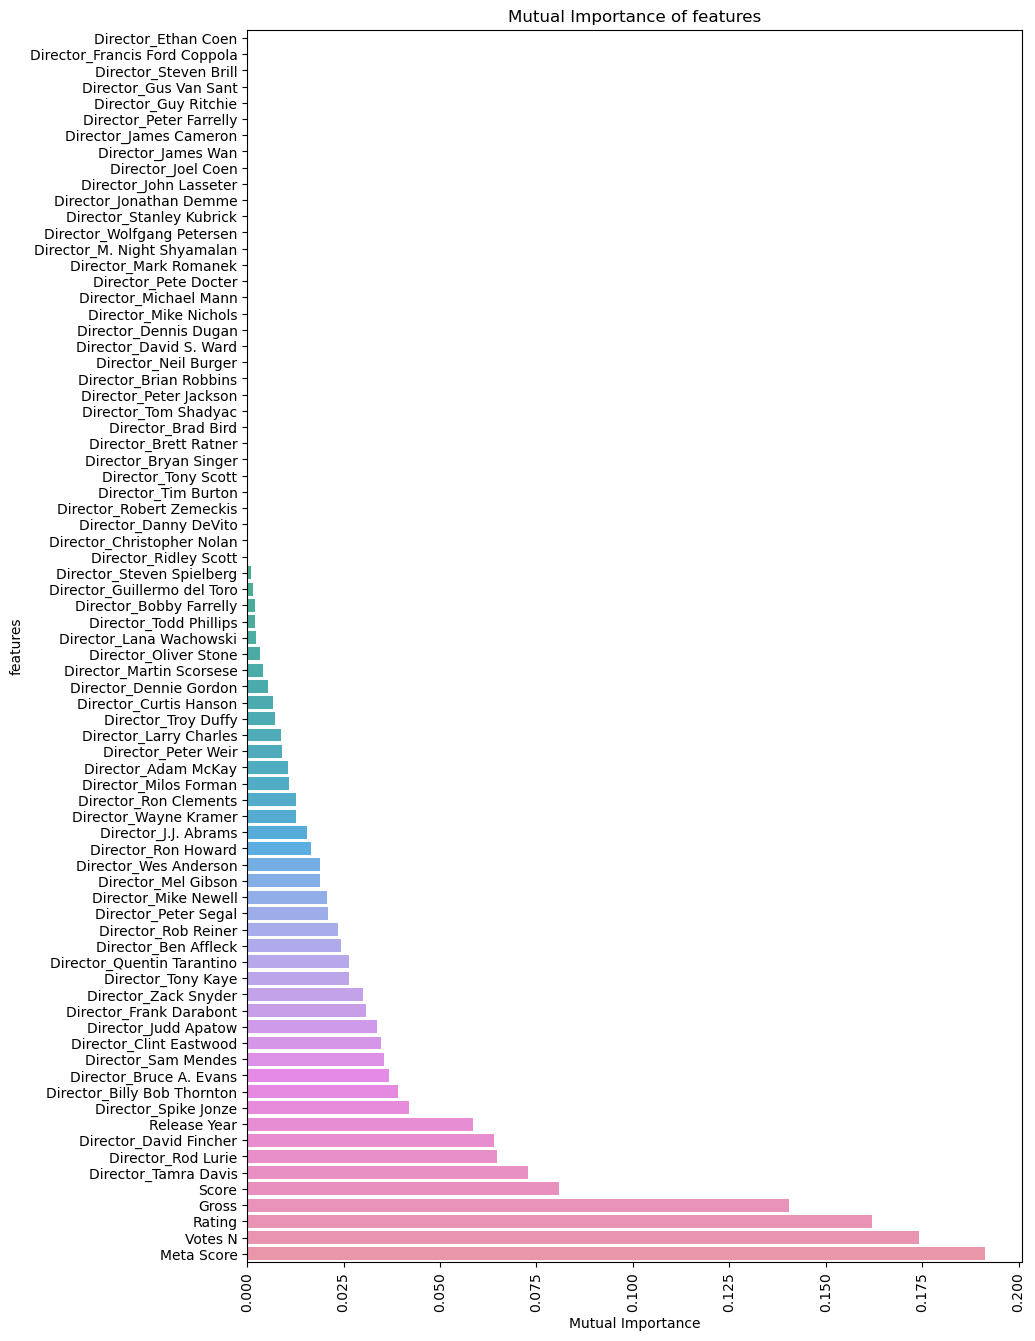

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,16))
sns.barplot(data = importances,y = "features", x = "importance",order=importances.sort_values('importance').features)
plt.xlabel("Mutual Importance")
plt.xticks(rotation=90)
plt.title("Mutual Importance of features")
plt.show()

MetaScore
Score
Gross
Votes N
Rating

In [16]:
X_train_original =  X_train
X_test_original = X_test

In [17]:
selected_features = ['Meta Score','Score','Gross','Votes N','Rating','Release Year']

In [18]:
X_train = X_train_original[selected_features]
X_test = X_test_original[selected_features]

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#Run verirken kırmızı output görmeniz normal
norm_train = MinMaxScaler().fit(X_train)

# transform training data
X_train[np.array(X_train.columns)] = norm_train.transform(X_train)

# fit scaler on test data
norm_test = MinMaxScaler().fit(X_test)

# transform test data
X_test[np.array(X_test.columns)] = norm_test.transform(X_test)

C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\69520826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[np.array(X_train.columns)] = norm_train.transform(X_train)
C:\Users\ferid\AppData\Local\Temp\ipykernel_4932\69520826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[np.array(X_test.columns)] = norm_test.transform(X_test)


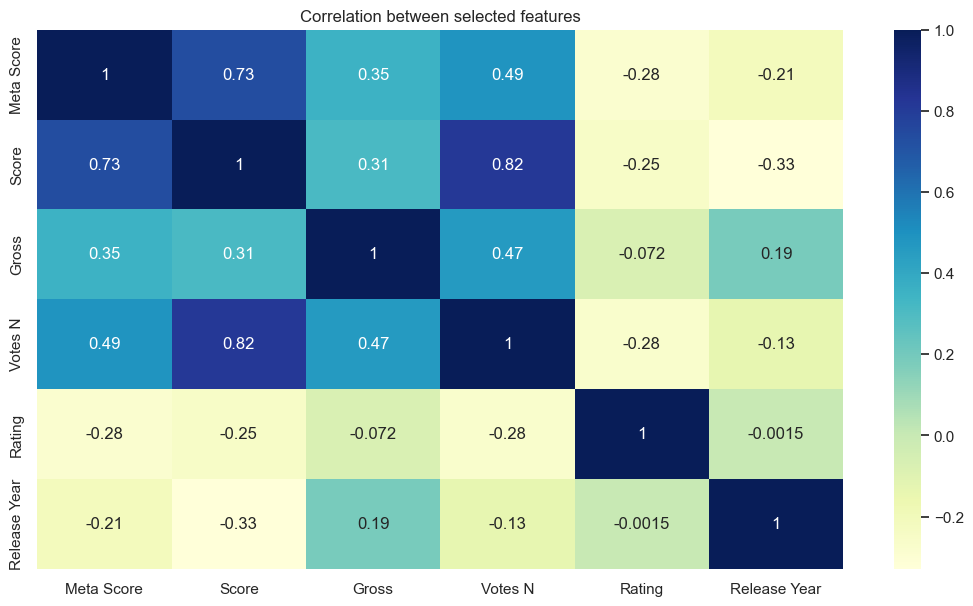

In [21]:
sns.set(rc={'figure.figsize':(13, 7)})
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation between selected features")
plt.show()

# Logistic Regression

In [22]:
# Logistic Regression kullanarak 10 katlı çapraz geçerleme
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
log_reg_model2 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train2, y_train2)
log_reg_model3 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train3, y_train3)
log_reg_model4 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train4, y_train4)
log_reg_model5 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train5, y_train5)
log_reg_model6 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train6, y_train6)
log_reg_model7 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train7, y_train7)
log_reg_model8 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train8, y_train8)
log_reg_model9 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train9, y_train9)
log_reg_model10 = LogisticRegression(random_state=0,solver='liblinear').fit(X_train10, y_train10)


In [23]:
y_pred = log_reg_model.predict(X_test)
y_pred2 = log_reg_model2.predict(X_test2)
y_pred3 = log_reg_model3.predict(X_test3)
y_pred4 = log_reg_model4.predict(X_test4)
y_pred5 = log_reg_model5.predict(X_test5)
y_pred6 = log_reg_model6.predict(X_test6)
y_pred7 = log_reg_model7.predict(X_test7)
y_pred8 = log_reg_model8.predict(X_test8)
y_pred9 = log_reg_model9.predict(X_test9)
y_pred10 = log_reg_model10.predict(X_test10)

In [24]:
coef = log_reg_model.coef_
intercept = log_reg_model.intercept_
r_squared = log_reg_model.score(X_train,y_train)

interpretation_table = {
    'features' : np.array(X_train.columns),
    'estimated' : coef[0]
}

interpretation_table = pd.DataFrame(interpretation_table)

print("Intercept : ",intercept[0])
print("R-Squared : ",r_squared,"\n\n")
print(interpretation_table)

Intercept :  -1.3726858273634477
R-Squared :  0.7689393939393939 


       features  estimated
0    Meta Score   1.480627
1         Score   1.199804
2         Gross   1.864762
3       Votes N  -0.028002
4        Rating  -1.270267
5  Release Year  -0.248963


In [25]:
#Run verirken kırmızı output görmeniz normal
from sklearn.metrics import classification_report, confusion_matrix
log_reg_dicts = [classification_report(y_test,y_pred,output_dict=True),classification_report(y_test2,y_pred2,output_dict=True),classification_report(y_test3,y_pred3,output_dict=True),classification_report(y_test4,y_pred4,output_dict=True),classification_report(y_test5,y_pred5,output_dict=True),classification_report(y_test6,y_pred6,output_dict=True),classification_report(y_test7,y_pred7,output_dict=True),classification_report(y_test8,y_pred8,output_dict=True),classification_report(y_test9,y_pred9,output_dict=True),classification_report(y_test10,y_pred10,output_dict=True)]
logistic_regression_accuracy = [d["accuracy"] for d in log_reg_dicts]
print(classification_report(y_test,y_pred))
print(classification_report(y_test2,y_pred2))
print(classification_report(y_test3,y_pred3))
print(classification_report(y_test4,y_pred4))
print(classification_report(y_test5,y_pred5))
print(classification_report(y_test6,y_pred6))
print(classification_report(y_test7,y_pred7))
print(classification_report(y_test8,y_pred8))
print(classification_report(y_test9,y_pred9))
print(classification_report(y_test10,y_pred10))
print(classification_report(y_test10,y_pred10))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.92      0.71      0.80        17

    accuracy                           0.80        30
   macro avg       0.81      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.50      0.20      0.29         5

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.67      0.33      0.44         6

    accuracy                           0.75        20
   macro avg       0.72      0.63      0.64        20
weighted avg       0.74      0.75      0.72        20

              preci

C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metr

# Random Forest

In [27]:
# Random Forest kullanarak 10 katlı çapraz geçerleme
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model2 = RandomForestClassifier(random_state=0)
random_forest_model3 = RandomForestClassifier(random_state=0)
random_forest_model4 = RandomForestClassifier(random_state=0)
random_forest_model5 = RandomForestClassifier(random_state=0)
random_forest_model6 = RandomForestClassifier(random_state=0)
random_forest_model7 = RandomForestClassifier(random_state=0)
random_forest_model8 = RandomForestClassifier(random_state=0)
random_forest_model9 = RandomForestClassifier(random_state=0)
random_forest_model10 = RandomForestClassifier(random_state=0)

In [28]:
random_forest_model.fit(X_train,y_train)
random_forest_model2.fit(X_train2,y_train2)
random_forest_model3.fit(X_train3,y_train3)
random_forest_model4.fit(X_train4,y_train4)
random_forest_model5.fit(X_train5,y_train5)
random_forest_model6.fit(X_train6,y_train6)
random_forest_model7.fit(X_train7,y_train7)
random_forest_model8.fit(X_train8,y_train8)
random_forest_model9.fit(X_train9,y_train9)
random_forest_model10.fit(X_train10,y_train10)

RandomForestClassifier(random_state=0)

In [29]:
print(classification_report(y_train,random_forest_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      1.00       130

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [30]:
y_pred = random_forest_model.predict(X_test)
y_pred2 = random_forest_model2.predict(X_test2)
y_pred3 = random_forest_model3.predict(X_test3)
y_pred4 = random_forest_model4.predict(X_test4)
y_pred5 = random_forest_model5.predict(X_test5)
y_pred6 = random_forest_model6.predict(X_test6)
y_pred7 = random_forest_model7.predict(X_test7)
y_pred8 = random_forest_model8.predict(X_test8)
y_pred9 = random_forest_model9.predict(X_test9)
y_pred10 = random_forest_model10.predict(X_test10)


In [31]:
random_for_dicts = [classification_report(y_test,y_pred,output_dict=True),classification_report(y_test2,y_pred2,output_dict=True),classification_report(y_test3,y_pred3,output_dict=True),classification_report(y_test4,y_pred4,output_dict=True),classification_report(y_test5,y_pred5,output_dict=True),classification_report(y_test6,y_pred6,output_dict=True),classification_report(y_test7,y_pred7,output_dict=True),classification_report(y_test8,y_pred8,output_dict=True),classification_report(y_test9,y_pred9,output_dict=True),classification_report(y_test10,y_pred10,output_dict=True)]
random_forest_accuracy = [d["accuracy"] for d in random_for_dicts]
print(classification_report(y_test,y_pred))
print(classification_report(y_test2,y_pred2))
print(classification_report(y_test3,y_pred3))
print(classification_report(y_test4,y_pred4))
print(classification_report(y_test5,y_pred5))
print(classification_report(y_test6,y_pred6))
print(classification_report(y_test7,y_pred7))
print(classification_report(y_test8,y_pred8))
print(classification_report(y_test9,y_pred9))
print(classification_report(y_test10,y_pred10))
print(classification_report(y_test10,y_pred10))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.85      0.65      0.73        17

    accuracy                           0.73        30
   macro avg       0.75      0.75      0.73        30
weighted avg       0.76      0.73      0.73        30

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.20      0.20      0.20         5

    accuracy                           0.60        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.60      0.60      0.60        20

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.20      0.17      0.18         6

    accuracy                           0.55        20
   macro avg       0.43      0.44      0.44        20
weighted avg       0.53      0.55      0.54        20

              preci

# Decision Tree

In [32]:
# Decision Tree kullanarak 10 katlı çapraz geçerleme
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model2 = DecisionTreeClassifier(random_state=0)
decision_tree_model3 = DecisionTreeClassifier(random_state=0)
decision_tree_model4 = DecisionTreeClassifier(random_state=0)
decision_tree_model5 = DecisionTreeClassifier(random_state=0)
decision_tree_model6 = DecisionTreeClassifier(random_state=0)
decision_tree_model7 = DecisionTreeClassifier(random_state=0)
decision_tree_model8 = DecisionTreeClassifier(random_state=0)
decision_tree_model9 = DecisionTreeClassifier(random_state=0)
decision_tree_model10 = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train,y_train)
decision_tree_model2.fit(X_train2,y_train2)
decision_tree_model3.fit(X_train3,y_train3)
decision_tree_model4.fit(X_train4,y_train4)
decision_tree_model5.fit(X_train5,y_train5)
decision_tree_model6.fit(X_train6,y_train6)
decision_tree_model7.fit(X_train7,y_train7)
decision_tree_model8.fit(X_train8,y_train8)
decision_tree_model9.fit(X_train9,y_train9)
decision_tree_model10.fit(X_train10,y_train10)

DecisionTreeClassifier(random_state=0)

In [33]:
print(classification_report(y_train,decision_tree_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      1.00       130

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [34]:
y_pred = decision_tree_model.predict(X_test)
y_pred2 = decision_tree_model2.predict(X_test2)
y_pred3 = decision_tree_model3.predict(X_test3)
y_pred4 = decision_tree_model4.predict(X_test4)
y_pred5 = decision_tree_model5.predict(X_test5)
y_pred6 = decision_tree_model6.predict(X_test6)
y_pred7 = decision_tree_model7.predict(X_test7)
y_pred8 = decision_tree_model8.predict(X_test8)
y_pred9 = decision_tree_model9.predict(X_test9)
y_pred10 = decision_tree_model10.predict(X_test10)

In [35]:
dec_tree_dicts = [classification_report(y_test,y_pred,output_dict=True),classification_report(y_test2,y_pred2,output_dict=True),classification_report(y_test3,y_pred3,output_dict=True),classification_report(y_test4,y_pred4,output_dict=True),classification_report(y_test5,y_pred5,output_dict=True),classification_report(y_test6,y_pred6,output_dict=True),classification_report(y_test7,y_pred7,output_dict=True),classification_report(y_test8,y_pred8,output_dict=True),classification_report(y_test9,y_pred9,output_dict=True),classification_report(y_test10,y_pred10,output_dict=True)]
decision_tree_accuracy = [d["accuracy"] for d in dec_tree_dicts]
print(classification_report(y_test,y_pred))
print(classification_report(y_test2,y_pred2))
print(classification_report(y_test3,y_pred3))
print(classification_report(y_test4,y_pred4))
print(classification_report(y_test5,y_pred5))
print(classification_report(y_test6,y_pred6))
print(classification_report(y_test7,y_pred7))
print(classification_report(y_test8,y_pred8))
print(classification_report(y_test9,y_pred9))
print(classification_report(y_test10,y_pred10))
print(classification_report(y_test10,y_pred10))

              precision    recall  f1-score   support

           0       0.52      0.92      0.67        13
           1       0.86      0.35      0.50        17

    accuracy                           0.60        30
   macro avg       0.69      0.64      0.58        30
weighted avg       0.71      0.60      0.57        30

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.17      0.20      0.18         5

    accuracy                           0.55        20
   macro avg       0.44      0.43      0.44        20
weighted avg       0.58      0.55      0.56        20

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.43      0.50      0.46         6

    accuracy                           0.65        20
   macro avg       0.60      0.61      0.60        20
weighted avg       0.67      0.65      0.66        20

              preci

# Support Vector Machine

In [36]:
# SVM kullanark 10 katlı çapraz geçerleme
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model2 = SVC(random_state = 0)
svm_model3 = SVC(random_state = 0)
svm_model4 = SVC(random_state = 0)
svm_model5 = SVC(random_state = 0)
svm_model6 = SVC(random_state = 0)
svm_model7 = SVC(random_state = 0)
svm_model8 = SVC(random_state = 0)
svm_model9 = SVC(random_state = 0)
svm_model10 = SVC(random_state = 0)

svm_model.fit(X_train, y_train)
svm_model2.fit(X_train2, y_train2)
svm_model3.fit(X_train3, y_train3)
svm_model4.fit(X_train4, y_train4)
svm_model5.fit(X_train5, y_train5)
svm_model6.fit(X_train6, y_train6)
svm_model7.fit(X_train7, y_train7)
svm_model8.fit(X_train8, y_train8)
svm_model9.fit(X_train9, y_train9)
svm_model10.fit(X_train10, y_train10)

SVC(random_state=0)

In [37]:
y_pred = svm_model.predict(X_test)
y_pred2 = svm_model2.predict(X_test2)
y_pred3 = svm_model3.predict(X_test3)
y_pred4 = svm_model4.predict(X_test4)
y_pred5 = svm_model5.predict(X_test5)
y_pred6 = svm_model6.predict(X_test6)
y_pred7 = svm_model7.predict(X_test7)
y_pred8 = svm_model8.predict(X_test8)
y_pred9 = svm_model9.predict(X_test9)
y_pred10 = svm_model10.predict(X_test10)

In [38]:
#Run verirken kırmızı output görmeniz normal
sup_vec_mac_dicts = [classification_report(y_test,y_pred,output_dict=True),classification_report(y_test2,y_pred2,output_dict=True),classification_report(y_test3,y_pred3,output_dict=True),classification_report(y_test4,y_pred4,output_dict=True),classification_report(y_test5,y_pred5,output_dict=True),classification_report(y_test6,y_pred6,output_dict=True),classification_report(y_test7,y_pred7,output_dict=True),classification_report(y_test8,y_pred8,output_dict=True),classification_report(y_test9,y_pred9,output_dict=True),classification_report(y_test10,y_pred10,output_dict=True)]
support_vector_machine_accuracy = [d["accuracy"] for d in sup_vec_mac_dicts]
print(classification_report(y_test,y_pred))
print(classification_report(y_test2,y_pred2))
print(classification_report(y_test3,y_pred3))
print(classification_report(y_test4,y_pred4))
print(classification_report(y_test5,y_pred5))
print(classification_report(y_test6,y_pred6))
print(classification_report(y_test7,y_pred7))
print(classification_report(y_test8,y_pred8))
print(classification_report(y_test9,y_pred9))
print(classification_report(y_test10,y_pred10))
print(classification_report(y_test10,y_pred10))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.92      0.71      0.80        17

    accuracy                           0.80        30
   macro avg       0.81      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

              preci

C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metr

# Naive bayes

In [39]:
# Naive Bayes kullanarak 10 katlı çapraz geçerleme
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model2 = GaussianNB()
nb_model3 = GaussianNB()
nb_model4 = GaussianNB()
nb_model5 = GaussianNB()
nb_model6 = GaussianNB()
nb_model7 = GaussianNB()
nb_model8 = GaussianNB()
nb_model9 = GaussianNB()
nb_model10 = GaussianNB()

nb_model.fit(X_train, y_train)
nb_model2.fit(X_train2, y_train2)
nb_model3.fit(X_train3, y_train3)
nb_model4.fit(X_train4, y_train4)
nb_model5.fit(X_train5, y_train5)
nb_model6.fit(X_train6, y_train6)
nb_model7.fit(X_train7, y_train7)
nb_model8.fit(X_train8, y_train8)
nb_model9.fit(X_train9, y_train9)
nb_model10.fit(X_train10, y_train10)

GaussianNB()

In [40]:
y_pred = nb_model.predict(X_test)
y_pred2 = nb_model2.predict(X_test2)
y_pred3 = nb_model3.predict(X_test3)
y_pred4 = nb_model4.predict(X_test4)
y_pred5 = nb_model5.predict(X_test5)
y_pred6 = nb_model6.predict(X_test6)
y_pred7 = nb_model7.predict(X_test7)
y_pred8 = nb_model8.predict(X_test8)
y_pred9 = nb_model9.predict(X_test9)
y_pred10 = nb_model10.predict(X_test10)

In [41]:
#Run verirken kırmızı output görmeniz normal
nav_bayes_dicts = [classification_report(y_test,y_pred,output_dict=True),classification_report(y_test2,y_pred2,output_dict=True),classification_report(y_test3,y_pred3,output_dict=True),classification_report(y_test4,y_pred4,output_dict=True),classification_report(y_test5,y_pred5,output_dict=True),classification_report(y_test6,y_pred6,output_dict=True),classification_report(y_test7,y_pred7,output_dict=True),classification_report(y_test8,y_pred8,output_dict=True),classification_report(y_test9,y_pred9,output_dict=True),classification_report(y_test10,y_pred10,output_dict=True)]
naive_bayes_machine_accuracy = [d["accuracy"] for d in nav_bayes_dicts]
print(classification_report(y_test,y_pred))
print(classification_report(y_test2,y_pred2))
print(classification_report(y_test3,y_pred3))
print(classification_report(y_test4,y_pred4))
print(classification_report(y_test5,y_pred5))
print(classification_report(y_test6,y_pred6))
print(classification_report(y_test7,y_pred7))
print(classification_report(y_test8,y_pred8))
print(classification_report(y_test9,y_pred9))
print(classification_report(y_test10,y_pred10))
print(classification_report(y_test10,y_pred10))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.86      0.71      0.77        17

    accuracy                           0.77        30
   macro avg       0.77      0.78      0.77        30
weighted avg       0.78      0.77      0.77        30

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.33      0.20      0.25         5

    accuracy                           0.70        20
   macro avg       0.55      0.53      0.53        20
weighted avg       0.66      0.70      0.67        20

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.33      0.50         6

    accuracy                           0.80        20
   macro avg       0.89      0.67      0.69        20
weighted avg       0.84      0.80      0.76        20

              preci

C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferid\anaconda3\lib\site-packages\sklearn\metr

# Comparison Graphs

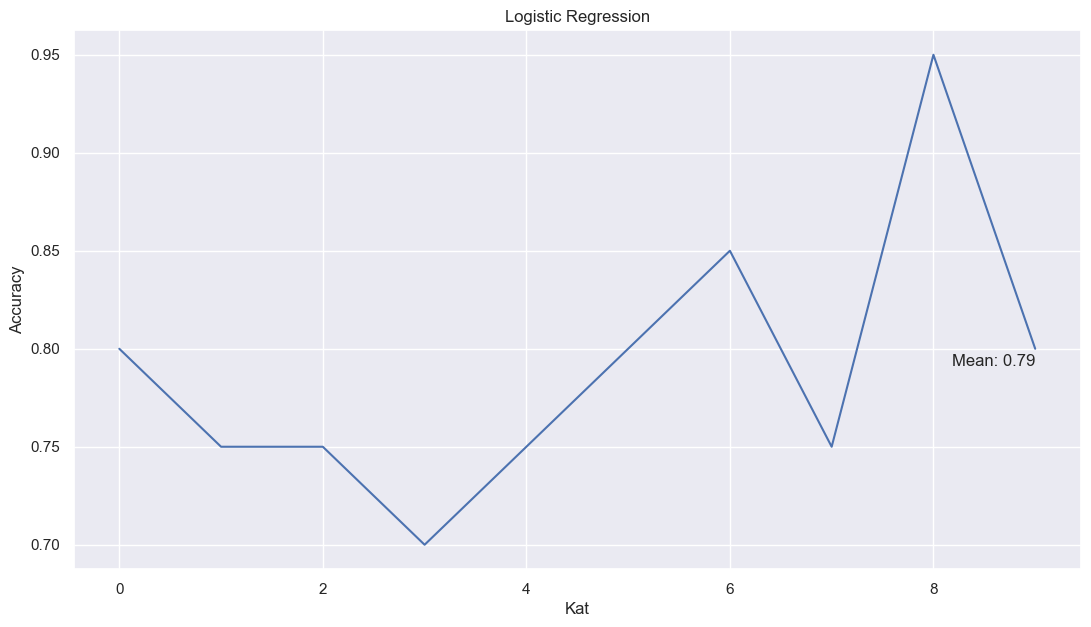

In [42]:
import statistics
x = range(len(logistic_regression_accuracy))

# Create a line graph
plt.plot(x, logistic_regression_accuracy)
mean_value = statistics.mean(logistic_regression_accuracy)


plt.xlabel('Kat')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')

plt.text(len(logistic_regression_accuracy) - 1, mean_value, f'Mean: {mean_value}', ha='right', va='bottom')


plt.show()

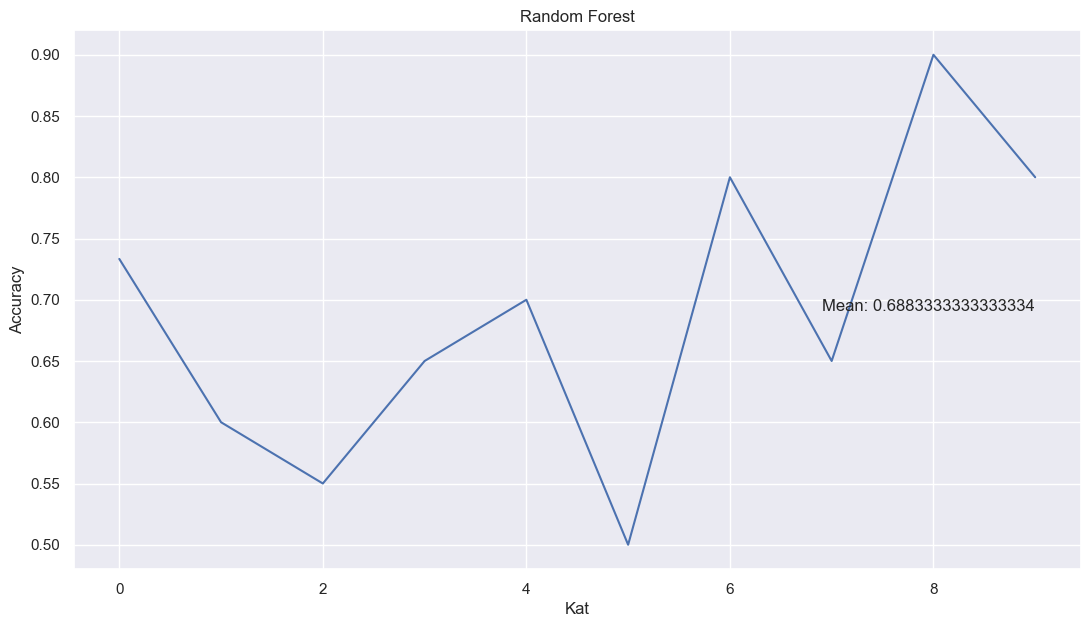

In [43]:
x = range(len(random_forest_accuracy))

# Create a line graph
plt.plot(x, random_forest_accuracy)
mean_value = statistics.mean(random_forest_accuracy)

# Add labels and title
plt.xlabel('Kat')
plt.ylabel('Accuracy')
plt.title('Random Forest')

plt.text(len(random_forest_accuracy) - 1, mean_value, f'Mean: {mean_value}', ha='right', va='bottom')

# Display the graph
plt.show()

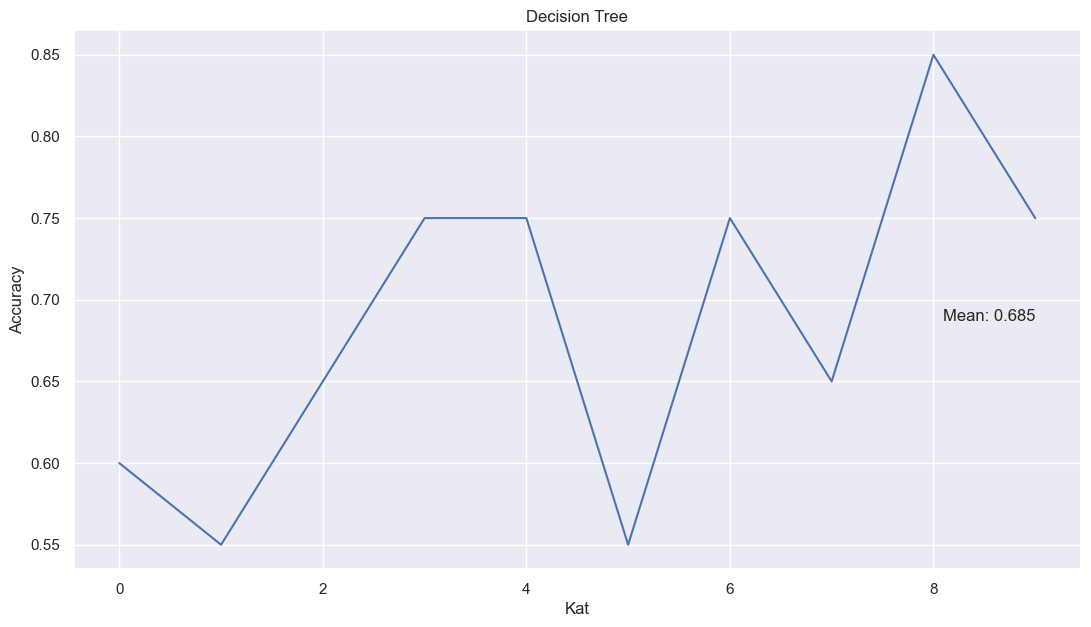

In [44]:
x = range(len(decision_tree_accuracy))

# Create a line graph
plt.plot(x, decision_tree_accuracy)
mean_value = statistics.mean(decision_tree_accuracy)

# Add labels and title
plt.xlabel('Kat')
plt.ylabel('Accuracy')
plt.title('Decision Tree')

plt.text(len(decision_tree_accuracy) - 1, mean_value, f'Mean: {mean_value}', ha='right', va='bottom')

# Display the graph
plt.show()

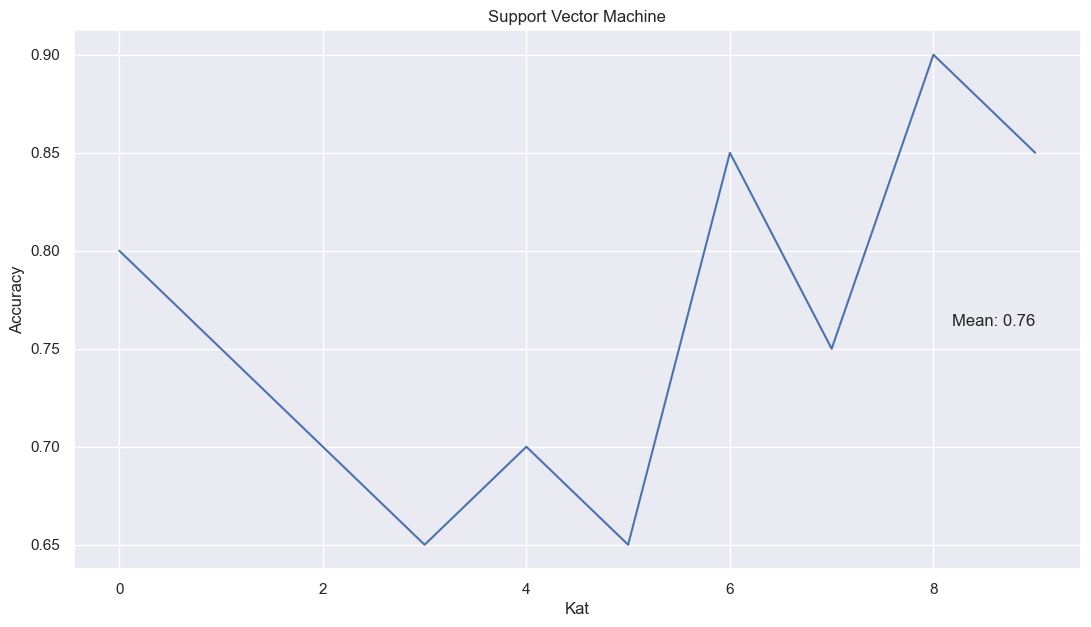

In [45]:
x = range(len(support_vector_machine_accuracy))

# Create a line graph
plt.plot(x, support_vector_machine_accuracy)
mean_value = statistics.mean(support_vector_machine_accuracy)

# Add labels and title
plt.xlabel('Kat')
plt.ylabel('Accuracy')
plt.title('Support Vector Machine')

plt.text(len(support_vector_machine_accuracy) - 1, mean_value, f'Mean: {mean_value}', ha='right', va='bottom')

# Display the graph
plt.show()

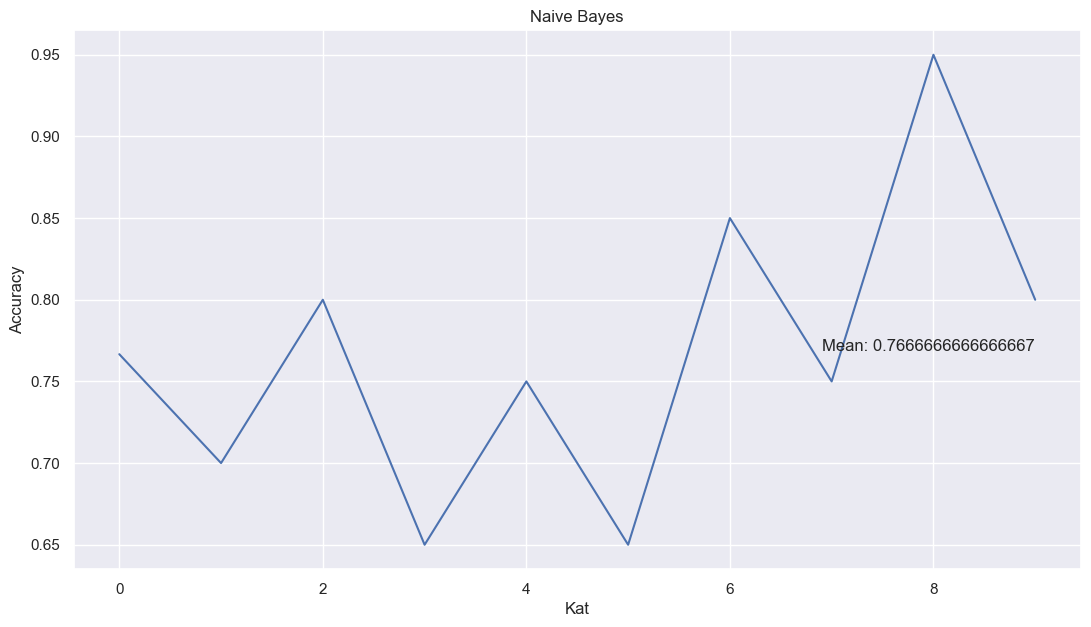

In [46]:
x = range(len(naive_bayes_machine_accuracy))

# Create a line graph
plt.plot(x, naive_bayes_machine_accuracy)
mean_value = statistics.mean(naive_bayes_machine_accuracy)

# Add labels and title
plt.xlabel('Kat')
plt.ylabel('Accuracy')
plt.title('Naive Bayes')

plt.text(len(naive_bayes_machine_accuracy) - 1, mean_value, f'Mean: {mean_value}', ha='right', va='bottom')

# Display the graph
plt.show()

# Netice

### Kullandığım 5 alqoritmadan en iyisi Logistic Regression oldu. En kötüsüyse Decision Tree. Bu göstericiler değişe bilir amma genel olarak böyle kalırlar.